# Exercise Sheet 02: Principal Component Analysis, Factor Analysis, K-Means, and Gaussian Mixture Models

**Introduction to Data Mining WS23/24**  
**Bielefeld University**  
**Alina Deriyeva, Benjamin Paaßen**  
**Exercise Sheet Publication Date: 2023-11-06**  
**Exercise Sheet Submission Deadline: Friday, 2023-11-17, noon (i.e. 12:00), via Moodle.**

**NOTE** The use of language models/AI tools is permitted IF you notify us of the use (just indicate it in the respective task) and are still able to understand and present your results. We also appreciate it if you link to a chatlog of the interaction with the language model/AI tool so that we can understand better how students tend to use these tools.

**AUTHORS**

Florian Wicher, Christopher Gerz, Torben Lambrecht, Bastian Hunecke

## Preamble: Data set

The file `sheet02_data.csv` contains fictional data as you might find in an online course. Each row represents a student, each column a feature of the student's activity in the course, namely their number of posts in the course discussion forum, the number of questions they asked in chat during the online lectures, the number of messages they sent to their peers, and the number of points they achieved in each of the five exercises of the course.

Note that there is quite a bit of missing data for later exercises because many students dropped out of the course early.

The following line loads this raw data and prints it.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

features = ['num_forum_postings',
    'num_questions',
    'num_messages',
    'num_completed_tasks',
    'points_exercise_1',
    'points_exercise_2',
    'points_exercise_3',
    'points_exercise_4',
    'points_exercise_5']

X = np.loadtxt('sheet02_data.csv', skiprows = 1, delimiter = '\t')
print(X)

[[ 3.  1.  1. ... 56. 61. 60.]
 [ 0.  0.  0. ... nan nan nan]
 [ 7.  3.  2. ... 66. 57. nan]
 ...
 [ 0.  0.  0. ... 30. nan nan]
 [ 1.  0.  0. ... nan nan nan]
 [ 3.  0.  1. ... 40. 35. 40.]]


### Task 02.01

Our first challenge is to impute the missing data. Fill in missing values with the mean points the respective student got on the other exercises. For students with no completed exercises, fill in zeros.

In [6]:
# YOUR CODE HERE
for row in X:
    
    #check if there are only nan values
    if np.count_nonzero(np.isnan(row)) == 5:
        row[4:9] = 0
    
    #check if we have to impute missing values
    if np.count_nonzero(np.isnan(row)) != 0:
        
        #compute mean
        student_mean = np.nanmean(row[4:8])
        
        for i in range(4,9):
            if np.isnan(row[i]):
                row[i] = student_mean
            
print(X)

[[ 3.          1.          1.         ... 56.         61.
  60.        ]
 [ 0.          0.          0.         ... 24.5        24.5
  24.5       ]
 [ 7.          3.          2.         ... 66.         57.
  60.75      ]
 ...
 [ 0.          0.          0.         ... 30.         30.66666667
  30.66666667]
 [ 1.          0.          0.         ... 13.         13.
  13.        ]
 [ 3.          0.          1.         ... 40.         35.
  40.        ]]


In [7]:
# this cell is here for test purposes. please ignore it. 

### Task 02.02

Next, normalize the data by dividing by the maximum value in each column.

In [8]:
# YOUR CODE HERE

#compute column means

col_max = np.max(X, axis=0)

for i in range(len(X)):
    X[i] = np.divide(X[i], col_max)
    
X

array([[0.25      , 0.2       , 0.11111111, ..., 0.70886076, 0.7721519 ,
        0.76923077],
       [0.        , 0.        , 0.        , ..., 0.31012658, 0.31012658,
        0.31410256],
       [0.58333333, 0.6       , 0.22222222, ..., 0.83544304, 0.72151899,
        0.77884615],
       ...,
       [0.        , 0.        , 0.        , ..., 0.37974684, 0.38818565,
        0.39316239],
       [0.08333333, 0.        , 0.        , ..., 0.16455696, 0.16455696,
        0.16666667],
       [0.25      , 0.        , 0.11111111, ..., 0.50632911, 0.44303797,
        0.51282051]])

In [9]:
# this cell is here for test purposes. please ignore it. 

## Principal Component Analysis

### Task 02.03

Compute the covariance matrix of the data via `np.cov` and compute the eigenvalues of the covariance matrix via `np.linalg.eigvals`. Provide a plot of the eigenvalues on the y-axis, sorted according to size (the largest eigenvalue at x=1, the second-largest on x=2, and so on).

Compute and report the percentage of variance covered by the first two eigenvalues.

**HINT:** `np.cov` treats the rows as variables and columns as observations. For our data set, rows are observations and columns are variables.

Percentage of variance covered by the first two eigenvalues: 90.89850565655809%


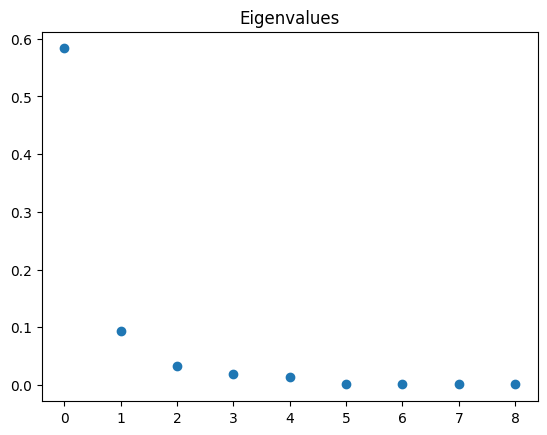

In [10]:
# YOUR CODE HERE
cov_matrix = np.cov(X.T)


ev, _  = np.linalg.eig(cov_matrix)

ev = np.flip(np.sort(ev))


print(f"Percentage of variance covered by the first two eigenvalues: {sum(ev[:2]) / sum(ev) * 100}%")


plt.title("Eigenvalues")
plt.scatter(x=[i for i in range(len(ev))],y=ev);

In [11]:
# this cell is here for test purposes. please ignore it. 

### Task 02.04

Use the `fit` method of a `sklearn.decomposition.PCA` model to perform a principal component analysis of this data with `n_components = 2`.

Transform the data to the latent space via the `transform` function of the PCA model.

Plot the data using a 2D scatter plot.

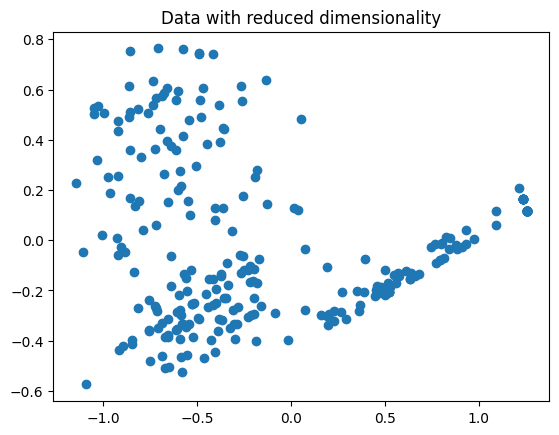

In [12]:
# YOUR CODE HERE
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

X_reduced = pca.transform(X)

x = [i[0] for i in X_reduced]
y = [i[1] for i in X_reduced]


plt.title("Data with reduced dimensionality")
plt.scatter(x,y);

In [13]:
# this cell is here for test purposes. please ignore it. 

### Task 02.05 (Bonus Task)

Compute the eigenvalue decomposition of the covariance matrix and perform PCA yourself. Only retain the two most prominent components and plot the transformed data with a 2D scatter plot. Check whether your plot is consistent with the plot above.

In [14]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [ ]:
# this cell is here for test purposes. please ignore it. 

## Factor Analysis

### Task 02.06

Use the `fit` method of a `sklearn.decomposition.FactorAnalysis` model to perform a factor analysis of this data with `n_components = 2`. Use the `rotation = 'varimax'` parameter.

Transform the data to the latent space via the `transform` function of the FA model.

Plot the data using a 2D scatter plot.

Compare this plot to the plot above. What difference do you notice?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# this cell is here for test purposes. please ignore it. 

YOUR ANSWER HERE

### Task 02.07

Print the `components_` property of the factor analysis model. For both factors, report which features/columns of the data have high weights.

Try to interpret the 

Print the factors found by the factor analysis using `print(model.components_)`. Try to interpret both factors. What does the first factor represent? What does the second factor represent?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

## Clustering

### Task 02.08

Using `sklearn.cluster.KMeans`, perform cluster analyses of the data for `n_clusters` between 2 and 10. For each value of `n_clusters`, compute the `sklearn.metrics.silhouette_score`. Provide a plot of the silhouette score on the y axis and `n_clusters` on the x axis. Report which value for `n_clusters` is best according to this analysis.

**HINT:** The `silhouette_score` function requires the cluster labels as second argument. You can retrieve the cluster labels from a fitted `KMeans` model via the `predict` function.

C:\Users\basti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\basti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\basti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

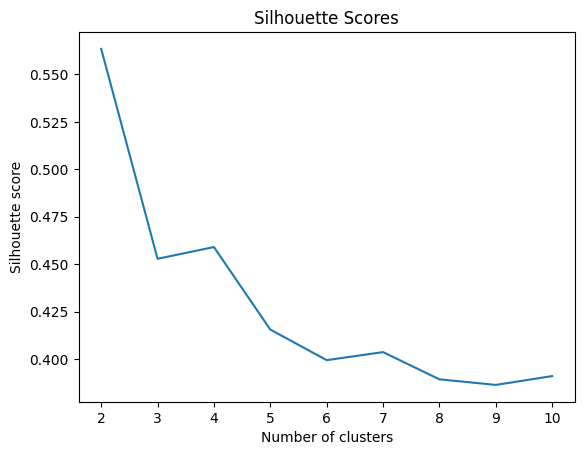

In [77]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n in range(2, 11):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

plt.title("Silhouette Scores")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.plot([i for i in range(2,11)], silhouette_scores)
plt.show()


In [ ]:
# this cell is here for test purposes. please ignore it. 

Since `n_clusters = 2` has the highest silhouette score, it is the best value for $K$.

### Task 02.09

Using `sklearn.cluster.KMeans`, perform a cluster analysis of the data with `n_clusters = 2`. Provide a scatter plot of the latent representation of the data according to factor analysis, where the color of each point represents the cluster membership.

C:\Users\basti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


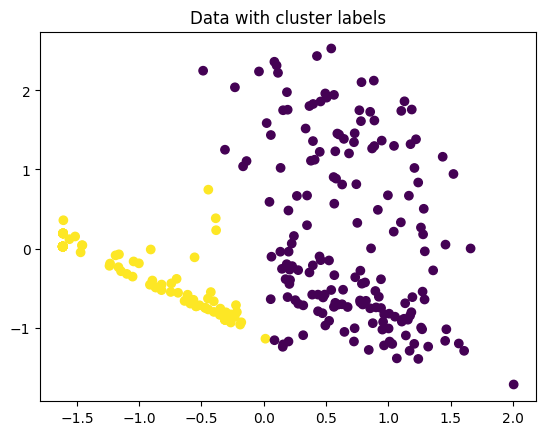

In [79]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2)
X_transformed = fa.fit_transform(X)

kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X_transformed)

plt.title("Data with cluster labels")
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=clusters)
plt.show()

C:\Users\basti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


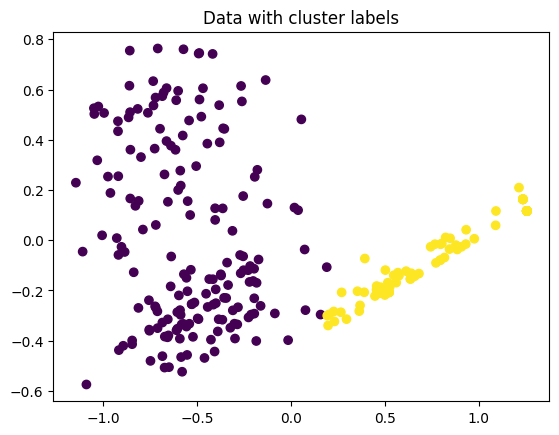

In [78]:
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(X)

plt.title("Data with cluster labels")
plt.scatter(x,y, c=labels)
plt.show()

In [ ]:
# this cell is here for test purposes. please ignore it. 

### Task 02.10 (bonus task)

Repeat the cluster analysis, but perform it on the latent representation according to factor analysis. Plot the new clustering. Check if it is consistent with the plot above.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# this cell is here for test purposes. please ignore it. 

### Task 02.11 (bonus task)

Implement $K$-Means yourself. Check if your result is consistent with the result provided by the `sklearn` implementation.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Gaussian Mixture Models

### Task 02.12

Using `sklearn.mixture.GaussianMixture`, perform cluster analyses of the data with `n_components` between 2 and 10. For each cluster analysis, compute the `bic` function value of the model (this is the Bayesian information criterion). Provide a plot of the bic value on the y axis with `n_components` on the x axis.

Report which value for `n_components` is best according to this analysis.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# this cell is here for test purposes. please ignore it. 

### Task 02.13

Using `sklearn.mixture.GaussianMixture`, perform a cluster analysis of the data with `n_components = 2`. Provide a scatter plot of the latent representation of the data according to factor analysis, where the color of each point represents the cluster membership.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# this cell is here for test purposes. please ignore it. 

### Task 02.14

Using `sklearn.mixture.GaussianMixture`, perform a cluster analysis of the latent space representation according to factor analysis with `n_components = 3`. Provide a scatter plot, where the color of each point represents the cluster membership.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# this cell is here for test purposes. please ignore it. 

### Task 02.15

Print the mean feature values for each cluster. Try to interpret the clusters: What are the mean differences between the clusters? How would you name each cluster?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### Task 02.16

Recall the equation for the expected negative log likelihood in a Gaussian mixture model from the lecture:

\begin{align*}
Q = &\sum_{i=1}^N \sum_{k=1}^K -\gamma_{k,i} \log\Big[ p_{X|Z}(x_i|k) \cdot p_Z(k) \Big]\\
=& \sum_{i=1}^N \sum_{k=1}^K \gamma_{k,i} \Big(\frac{1}{2}\log[2\pi \det(\Sigma_k)] + \frac{1}{2} (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k) - \log[p_Z(k)]\Big)
\end{align*}

Assuming that $Q$ is convex, find the optimal values for $\mu_k$ and $\Sigma_k$

**HINT:** You may use the following general matrix/vector gradient equations (refer to the [matrix cook book by Peterson and Pedersen (2012), p.10-11](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf) :
\begin{align*}
\nabla_x (x - y)^T W (x - y) &= 2 W (x-y) \\
\nabla_W (x - y)^T W (x - y) &= (x-y)(x-y)^T \\
\nabla_{W^{-1}} \log[\det(W)] &= -W & \text{if $W$ is symmetric and positive semi-definite}
\end{align*}

YOUR ANSWER HERE